In [ ]:
from fastai.vision.all import *
from fastcore.test import *
from fastbook import plot_function

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Binary-Image-Classifier-From-Scratch" data-toc-modified-id="Binary-Image-Classifier-From-Scratch-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Binary Image Classifier From Scratch</a></span><ul class="toc-item"><li><span><a href="#Explore-data" data-toc-modified-id="Explore-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Explore data</a></span></li><li><span><a href="#Idea:-distance-from-average-pixel-values" data-toc-modified-id="Idea:-distance-from-average-pixel-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Idea: distance from average pixel values</a></span></li><li><span><a href="#Tensor-practice" data-toc-modified-id="Tensor-practice-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Tensor practice</a></span></li><li><span><a href="#How-good-is-L1-dist-model?" data-toc-modified-id="How-good-is-L1-dist-model?-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>How good is L1 dist model?</a></span></li></ul></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Making-steps" data-toc-modified-id="Making-steps-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Making steps</a></span></li></ul></li><li><span><a href="#MNIST-Loss-Function" data-toc-modified-id="MNIST-Loss-Function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MNIST Loss Function</a></span><ul class="toc-item"><li><span><a href="#Jumpstart" data-toc-modified-id="Jumpstart-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Jumpstart</a></span></li><li><span><a href="#Moving-on" data-toc-modified-id="Moving-on-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Moving on</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-need-a-better-loss-fxn-s.t.-small-changes-in-params-result-in-small-changes-in-loss" data-toc-modified-id="We-need-a-better-loss-fxn-s.t.-small-changes-in-params-result-in-small-changes-in-loss-3.2.0.1"><span class="toc-item-num">3.2.0.1&nbsp;&nbsp;</span>We need a better loss fxn s.t. small changes in params result in small changes in loss</a></span></li><li><span><a href="#Bounding-and-transforming-activations-with-our-good-friend-Sigmoid" data-toc-modified-id="Bounding-and-transforming-activations-with-our-good-friend-Sigmoid-3.2.0.2"><span class="toc-item-num">3.2.0.2&nbsp;&nbsp;</span>Bounding and transforming activations with our good friend Sigmoid</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Putting-it-all-together" data-toc-modified-id="Putting-it-all-together-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Putting it all together</a></span><ul class="toc-item"><li><span><a href="#Jumpstart" data-toc-modified-id="Jumpstart-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Jumpstart</a></span></li><li><span><a href="#Train-one-epoch" data-toc-modified-id="Train-one-epoch-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Train one epoch</a></span></li></ul></li></ul></div>

# Binary Image Classifier From Scratch
> Created: Sep 1, 2020

What we're building: `f(im) → 1 if im==three; 0 if im!=three`

## Explore data

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [ ]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

In [ ]:
im7path = sevens[0]
im7 = Image.open(im7path)
im7

In [ ]:
(path/'train').ls()

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

In [ ]:
im7path = sevens[0]
im7 = Image.open(im7path)
im7

In [ ]:
tensor(im7)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
im7t = tensor(im7)
# Throw into pandas to visualize it using background gradient
df = pd.DataFrame(im7t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,21,51,213,254,252,252,252,254,252,252,252,254,252,252,252,255,252,100,0,0,0,0,0,0
8,0,0,0,21,161,250,250,252,250,250,250,252,250,250,250,252,250,250,250,252,250,100,0,0,0,0,0,0
9,0,0,0,51,250,250,250,252,189,190,250,252,250,250,250,252,250,250,250,252,189,40,0,0,0,0,0,0


## Idea: distance from average pixel values

- Find average activations for each pixel for all threes, sevens
- Classify based on least distance (L1) from avg 3, 7
- ∴ output is 2 activations: L1 distance from avg3, avg7

Lists of image tensors

In [ ]:
tens3 = [tensor(Image.open(o)) for o in threes]
tens7 = [tensor(Image.open(o)) for o in sevens]
# len(three_ts), len(seven_ts)

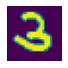

In [ ]:
show_image(tens3[5])

In [ ]:
type(tens3[0])

torch.Tensor

Stack lists into tensors. Floats in computer vision expected between 0. and 1.

In [ ]:
stk3 = torch.stack(tens3).float()/255
stk7 = torch.stack(tens7).float()/255
stk7.shape

torch.Size([6265, 28, 28])

Output above has 3 axes, ∴ stk7 is a rank 3 tensor. 3 axes == 3 dimensions.

In [ ]:
stk7.ndim

3

In [ ]:
stk7.mean()

tensor(0.1145)

The avg we want isn't the avg over all cells, it's the avg over the img dimension. We can pass the idx of the dim to tensor.mean() to do that.

In [ ]:
stk7.mean() # wrong

tensor(0.1145)

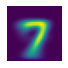

In [ ]:
av7 = stk7.mean(0) # correct!
show_image(av7)

In [ ]:
av7rows = stk7.mean(1) # wrong
show_image(av7rows)

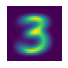

In [ ]:
av3 = stk3.mean(0)
show_image(av3)

Take pixel diff of L1(av7, some7) and L1(av3, some3) and choose the lower value.
- Convert pixel values to range [0,1]
- Take L1 for every pixel
- Sum it up
- Output min

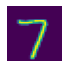

In [ ]:
ex7 = stk7[42]
show_image(ex7)

Take diffs:

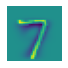

In [ ]:
diff7 = ex7-av7
show_image(diff7)

Convert to abs:

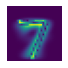

In [ ]:
diff7abs = diff7.abs()
show_image(diff7abs.abs())

Sum up L1s:

In [ ]:
diff7abs.sum()

tensor(71.7717)

Add diff against av3:

In [ ]:
diff3 = ex7c-av3
show_image(diff3)

NameError: name 'ex7c' is not defined

Clean up/refactor:

In [ ]:
a3 = stk3[1]
a3_L1_3 = (a3-av3).abs().mean()
a3_L1_7 = (a3-av7).abs().mean()
a3_L1_3, a3_L1_7

Using torch loss fxns:

In [ ]:
F.l1_loss(a3,av3), F.l1_loss(a3,av7)

## Tensor practice

In [ ]:
stk3[0]

In [ ]:
stk3[0,0]

In [ ]:
stk3[0,0:3]

## How good is L1 dist model?

In [ ]:
train3,train7 = tens3,tens7

In [ ]:
valid3 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'3').ls()]
    ).float()/255
valid7 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'7').ls()]
    ).float()/255

valid3.shape,valid7.shape

In [ ]:
show_image(valid3[0])

In [ ]:
def mnist_dist(a,b): return (a-b).abs().mean((-1,-2)) # last and second-last dims
mnist_dist(a3,av3)

Broadcasting!!!

In [ ]:
valid3_dist = mnist_dist(valid3, av3)
valid3_dist

What is broadcasting? Notice that the following shapes don't match. PyTorch will "copy" the smaller shape 1010 times and subtract it from each of the 1010 stacks in valid3'd first axis. This is actually super high performance because it doesn't actually copy (no extra memory is allocated), and it's done on the GPU.

In [ ]:
valid3.shape

In [ ]:
av3.shape

These have the same shape, so this happens as expected:

In [ ]:
tensor([1,1,1]) + tensor([0,1,2])

In [ ]:
def is3(o): return mnist_dist(o,av3) < mnist_dist(o,av7)

In [ ]:
is3(stk3[0]), is3(stk7[0])

In [ ]:
is3(valid3)

In [ ]:
acc3 =     is3(valid3).float().mean()
acc7 =(1 - is3(valid7).float()).mean()

In [ ]:
acc3, acc7, (acc3 + acc7)/2

This model is 95% accurate.

# Gradient Descent

The avg L1 approach weighted every single px equally. This will give each px a unique weight, so that (for example) the pixels along the edge matter less than the pixels in the middle (or something like that).

In [ ]:
def f(x): return x**2

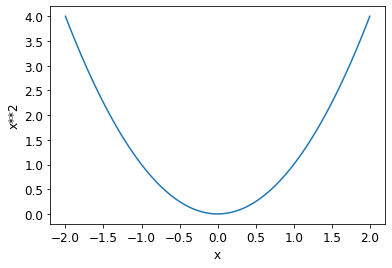

In [ ]:
plot_function(f, 'x', 'x**2')

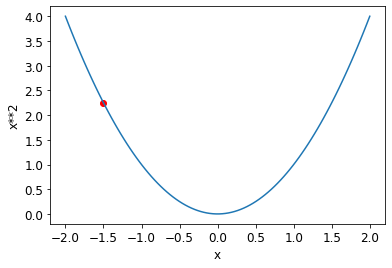

In [ ]:
plot_function(f, 'x', 'x**2')
x = -1.5
plt.scatter(x, f(x), color='red')

Steps for gradient descent:
1. Initialize parameters
2. Calc output
3. Calc loss
4. Calc gradient of loss (gradient is a matrix of partial derivatives)
5. Subtract gradient × step_size from params
6. First pass done; repeat # epochs-1 more times.

PyTorch derivs & grads w/ `requires_grad_()`

In [ ]:
x = tensor(3.).requires_grad_()

In [ ]:
y = f(x); y

In the above output, grad_fn knows that a power operation was taken.

Tell torch to take a deriv by using `.backward()`:

In [ ]:
y.backward()

In [ ]:
x.grad

Clean examples:

In [ ]:
x1,x2 = tensor(2.).requires_grad_(), tensor(3.).requires_grad_()

def f(x): return x**2

y = f(x1) + f(x2) # this built a graph behind the scenes.

y.backward() # this computes & stores derivatives for vars used in y.

x1.grad, x2.grad

In [ ]:
x1,x2 = tensor(2.).requires_grad_(), tensor(2.).requires_grad_()
def f1(x): return x**2
def f2(x): return x**3
y = f1(x1) + f2(x2)
y.backward()
x1.grad, x2.grad

Example with slightly bigger tensors:

Implicit .backward() call:

In [ ]:
x1 = tensor([1.,2.,3.]).requires_grad_()
x2 = tensor([2.,2.,2.]).requires_grad_()
def f1(x): return (x**2).sum() # sums() required b/c implicit call requires scalar y val
def f2(x): return (x**3).sum()
y = f1(x1) + f2(x2)
print(y) # y is scalar
y.backward() # no arg passed ("implicit")
x1.grad, x2.grad

Explicit .backward() call:

In [ ]:
x1 = tensor([1.,0.,0.]).requires_grad_()
x2 = tensor([1.,1.,1.]).requires_grad_()
def f(x): return x**2
def g(x): return 3*x

y = f(x1) + g(x2); print(y) # y isn't scalar
y.backward(x1)
print(x1.grad, x2.grad)   

In [ ]:
y = f(x1) + g(x2)
y.backward(x2)
print(x1.grad, x2.grad) 

Interesting:
- `y.bw(x1)` → `x1.grad = df(x1)` , `x2.grad = dg(x1)` 
- `y.bw(x2)` → `x1.grad = df(x2)` , `x2.grad = dg(x2)`

## Making steps

In [ ]:
t = torch.arange(0,20).float()
speed = torch.randn(20)*3 + 0.75*(t-9.5)**2 + 1
plt.scatter(t,speed)

In [ ]:
def f(t,params):
    a,b,c = params
    return a*t**2 + b*t + c

def L1(preds, targs): return (preds-targs).abs().mean()

p = torch.randn(3).requires_grad_()
p_init = p.clone()

yf = f(t,p)

def show_yf(yf, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(t, speed)
    ax.scatter(t, to_np(yf), color='red')
    ax.set_ylim(-100,100)
    
show_yf(yf)

In [ ]:
loss = L1(yf,speed)
loss.backward()

lr = 1e-3
p.data -= lr * p.grad.data # We must use p.data so we don't calculate p.grad here.
p.grad = None

yf = f(t,p)

show_yf(yf)

Wrap the above cell into a fxn:

In [ ]:
def do_step(p, prn=True):
    yf = f(t,p)
    loss = L1(yf,speed)
    loss.backward()
    p.data -= lr * p.grad.data
    p.grad = None
    if prn: print(loss.item())
    return yf

In [ ]:
for i in range(5): do_step(p)

In [ ]:
p = p_init.detach().requires_grad_()

In [ ]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_yf(do_step(p, True), ax)
plt.tight_layout()

In [ ]:
def show_n_steps(p,n=4,fsz=3,show_yf=show_yf,do_step=do_step):
    _,axs = plt.subplots(1,n,figsize=(n*fsz,fsz))
    for ax in axs: show_yf(do_step(p, True), ax)
    plt.tight_layout()

In [ ]:
p = torch.randn(3).requires_grad_()

In [ ]:
show_n_steps(p,10)

# MNIST Loss Function

We can't use predicted accuracy as the loss fxn because small changes to parameters may not affect predictions; ∴ grad would be zero. Althought accuracy will still be the most important metric to us for judging the model, in order to make grad descent work, we need a loss fxn that will change even if accuracy isn't changing.

To make this work, we can weight accuracy by loss.

## Jumpstart

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path


## Train
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
# sevens

im7path = sevens[0]
im7 = Image.open(im7path)
# im7

tens3 = [tensor(Image.open(o)) for o in threes]
tens7 = [tensor(Image.open(o)) for o in sevens]
# len(three_ts), len(seven_ts)

stk3 = torch.stack(tens3).float()/255
stk7 = torch.stack(tens7).float()/255
# stk7.shape

train3,train7 = stk3,stk7


## Valid
valid3 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'3').ls()]
    ).float()/255
valid7 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'7').ls()]
    ).float()/255

## Moving on

Reshape tensors as vectors using `.view()`:

In [ ]:
train_x = torch.cat([stk3,stk7]).view(-1, 28*28) # -1 here means "do it for every row" ...
train_x.shape, stk3.shape, stk7.shape, stk3.shape[0]+stk7.shape[0] # ... see?

(torch.Size([12396, 784]),
 torch.Size([6131, 28, 28]),
 torch.Size([6265, 28, 28]),
 12396)

Make labels: 1s for 3s, 0s for 7s.

In [ ]:
train_y = tensor([1]*len(stk3) + [0]*len(stk7))
train_y, train_y.shape

(tensor([1, 1, 1,  ..., 0, 0, 0]), torch.Size([12396]))

In [ ]:
train_y.unsqueeze_(1), train_y.shape

(tensor([[1],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]]),
 torch.Size([12396, 1]))

Turn train_x and train_y into a `PyTorch Dataset`. A dataset is something that we can index into, and it returns a tuple.

In [ ]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

In [ ]:
valid_x = torch.cat([valid3,valid7]).view(-1, 28*28)
valid_y = tensor([1]*len(valid3) + [0]*len(valid7)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))
x,y = valid_dset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

Initialize.

In [ ]:
def init_p(size, var=1.0): return (torch.randn(size)*var).requires_grad_()

Our parameters will be weights and bias:

In [ ]:
weights = init_p((28*28,1)) # think of this as (rows, cols)
bias = init_p(1) # this is b in y=mx+b (yay, we have a bias term!)

Prediction for one img:

In [ ]:
# checking shapes to make sure I get the math right...
print(train_x[0].shape,
      weights.shape,
      bias.shape,
      sep='\n')

torch.Size([784])
torch.Size([784, 1])
torch.Size([1])


In [ ]:
# output shape I want is a scalar
yp = (train_x[0] * weights.T).sum() + bias
yp

tensor([-6.2330], grad_fn=<AddBackward0>)

Broadcast it!

In [ ]:
# checking shapes to make sure I get the math right...
print(train_x.shape,
      weights.shape,
      bias.shape, sep='\n')

torch.Size([12396, 784])
torch.Size([784, 1])
torch.Size([1])


In [ ]:
yp = (train_x * weights.T).sum(-1).unsqueeze(1) + bias
yp

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

Better way: matrix multiplication operator `@`.

In [ ]:
# [12396×1]=[12396×784]@[784×1]+b
yp = train_x@weights + bias
yp

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

In [ ]:
corrects = (yp>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [ ]:
corrects.float().mean().item() # .item() unwraps the scalar

0.5379961133003235

In [ ]:
corrects = (yp>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

#### We need a better loss fxn s.t. small changes in params result in small changes in loss

Say we have 3 imgs. They are a 3, a 7, and a 3. Call them y.
- `y = [1, 0, 1]`

Here's what the model predicted, and the associated activations:
- `yp = [1, 0, 0]`
- `a  = [.9, .4, .2]`

We want our loss function to output low losses for being correct and confident, and high lossess for being incorrect and confident:
- `loss = [.1, .4, .8]`

In [ ]:
def loss(yp, y): return torch.where(y==1, 1-yp, yp).mean()

In [ ]:
y  = tensor([1,0,1])
yp = tensor([.9,.4,.2])

In [ ]:
loss(yp,y)

tensor(0.4333)

#### Bounding and transforming activations with our good friend Sigmoid

Use the **sigmoid** function. It looks like this:

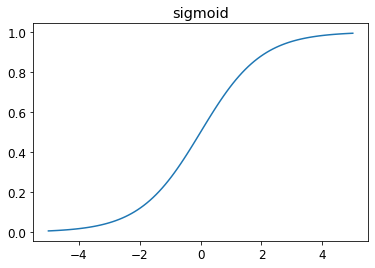

In [ ]:
from fastbook import *
plot_function(torch.sigmoid, title='sigmoid', min=-5,max=5)

To use it, simply slap it on the back of a tensor:

In [ ]:
tensor(-5.,-1,0,2,3).sigmoid()

tensor([0.0067, 0.2689, 0.5000, 0.8808, 0.9526])

Here's my **rormoid,** a sigmoid with a bigger "active linear range". The idea is to look at the range of your activations pre-sigmoid, then to adjust the sigmoid to fit the range.

In [ ]:
def rormoid(x,pctile=.95,top_activ=20):
    return 1/(1+torch.exp(-(-torch.log(tensor(1./pctile-1))/tensor(top_activ))*x))

It's the same as a sigmoid with a "stretch" factor:

In [ ]:
def get_stretch_factor(thresh=.95, top_activ=20):
    return -torch.log(tensor(1./thresh-1))/tensor(top_activ)

thsh,top = .9,100  # "90% of my activations are below 100"
stretch = get_stretch_factor(thsh,top)

def sigmoid(x):            return 1/(1+torch.exp(-x))
def rormoid_refactored(x): return 1/(1+torch.exp(-x*stretch))

It looks exactly like a sigmoid with a wider linear input range:

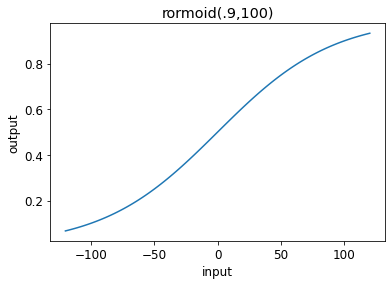

In [ ]:
def rormoid_95_20(x): return rormoid(x,thsh,top)
plot_function(rormoid20, 'input', 'output',title='rormoid(.9,100)',
              min=-top*1.2, max=top*1.2)

In [ ]:
print(sigmoid(tensor(-20.,0,20)))
print(rormoid(tensor(-20.,0,20))) # notice the nice round values

tensor([2.0612e-09, 5.0000e-01, 1.0000e+00])
tensor([0.0500, 0.5000, 0.9500])


These are our new sigmoid-including loss functions:

In [ ]:
def sig_loss(yp, y):
    yp = yp.sigmoid()
    return torch.where(y==1, 1-yp, yp).mean()

def ror_loss(yp, y):
    yp = rormoid(yp,20)
    return torch.where(y==1, 1-yp, yp).mean()

We ask for a batch of items with a **DataLoader.**

In [ ]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

DataLoader example with toy data. The point of this example is to look at the difference of what's in `ds` (tuples of x and y) vs what's in `list(dl)` (tuples of batched x's and y's).

In [ ]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [ ]:
dl = DataLoader(ds, batch_size=7, shuffle=True)
list(dl) # Iterators can be listed (you see their iterations):

[(tensor([ 6, 14, 12, 15, 24, 11,  0]), ('g', 'o', 'm', 'p', 'y', 'l', 'a')),
 (tensor([16,  2, 18, 25, 21,  8,  7]), ('q', 'c', 's', 'z', 'v', 'i', 'h')),
 (tensor([19, 23,  1,  9,  4, 13, 10]), ('t', 'x', 'b', 'j', 'e', 'n', 'k')),
 (tensor([ 5,  3, 17, 22, 20]), ('f', 'd', 'r', 'w', 'u'))]

Iterators can be looped through:

In [ ]:
for x,y in dl:
    print(x,y)

tensor([ 4,  7, 14,  2,  5, 21, 19]) ('e', 'h', 'o', 'c', 'f', 'v', 't')
tensor([15, 25, 24, 18, 20, 11, 17]) ('p', 'z', 'y', 's', 'u', 'l', 'r')
tensor([22,  9, 23, 10,  3,  0, 12]) ('w', 'j', 'x', 'k', 'd', 'a', 'm')
tensor([ 8,  6, 16, 13,  1]) ('i', 'g', 'q', 'n', 'b')


# Putting it all together

One training **epoch** (an epoch is an entire run through a dataset) will look like this:

`for x,y in dl:
    yp = model(x)      # make prediction
    loss = loss(yp, y) # calculate loss
    loss.backward()    # calculate gradient
    p -= p.grad * lr   # update params`
    
So, we can loop that for however many epochs we have.

## Jumpstart
> `train_ims/lbls/ds`, `valid_ims/lbls/ds`, `weights`, `bias`, `wb`, `linear`, `yp`, `accuracy`, `ror_loss()`

In [ ]:
### Imports ###
from fastai.vision.all import *
from fastcore.test import *
from fastbook import plot_function


### Data ###
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

train3 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'train'/'3').ls()]
    ).float()/255
train7 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'train'/'7').ls()]
    ).float()/255

valid3 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'3').ls()]
    ).float()/255
valid7 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'7').ls()]
    ).float()/255

train_ims = torch.cat([train3,train7]).view(-1, 28*28)
train_lbls = tensor([1]*len(train3) + [0]*len(train7)).unsqueeze(1)
train_ds = list(zip(train_ims,train_lbls))

valid_ims = torch.cat([valid3,valid7]).view(-1, 28*28)
valid_lbls = tensor([1]*len(valid3) + [0]*len(valid7)).unsqueeze(1)
valid_ds = list(zip(valid_ims,valid_lbls))


### Initialize Params ###
def init_p(size, var=1.0):
    return (torch.randn(size)*var).requires_grad_()
weights,bias = init_p((28*28,1)), init_p(1)


### Initial Prediction ###
def linear(x): return x@weights+bias
yp = linear(train_ims)


### Loss Function ###
def rormoid(x,pctile=.95,top_activ=20):
    return 1/(1+torch.exp(-(-torch.log(tensor(1./pctile-1))/tensor(top_activ))*x))
def ror_loss(yp, y):
    yp = rormoid(yp)
    return torch.where(y==1, 1-yp, yp).mean()
def sig_loss(yp, y):
    yp = torch.sigmoid(yp)
    return torch.where(y==1, 1-yp, yp).mean()

## Train one epoch

Create a `DataLoader`:

In [ ]:
train_dl = DataLoader(train_ds, batch_size = 64*2*2, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size = 64*2*2, shuffle=True)

def train_epoch(dl, model, lr, params):
    for x,y in dl:
        calc_grad(x,y,model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()
        
def calc_grad(x,y,model):
    yp = model(x)
    loss = sig_loss(yp,y)
    loss.backward()

def batch_accuracy(yp,y):
    pred = rormoid(yp)
    correct=(pred>0.5) == y
    return correct.float().mean()

def validate_epoch(dl, model):
    accs = [batch_accuracy(model(x), y) for x,y in dl]
    return round(torch.stack(accs).mean().item(), 3)

lr = .1
epochs = 30
weights = init_p((28*28,1))
bias = init_p(1)
params = (weights, bias)

for i in range(epochs):
    train_epoch(train_dl, linear, lr, params)
    if i%2==0:
        print(f'Epoch {i+1}:',validate_epoch(train_dl, linear), end='\n')
    elif i+1==epochs:
        print(f'Epoch {i+1}:',validate_epoch(train_dl, linear), end='\n')

Epoch 1: 0.633
Epoch 3: 0.805
Epoch 5: 0.875
Epoch 7: 0.903
Epoch 9: 0.918
Epoch 11: 0.929
Epoch 13: 0.937
Epoch 15: 0.942
Epoch 17: 0.946
Epoch 19: 0.949
Epoch 21: 0.951
Epoch 23: 0.954
Epoch 25: 0.956
Epoch 27: 0.958
Epoch 29: 0.96
Epoch 30: 0.96
